# Routing

# http methods decrie 'intent', they express what of request..i.e. what to do with  data, and telling server what your intnestion is like geettiong data

# it expereeses where,,, 



i need to <intent:fetch> data from <where:x.com>

You're mixing the axes. Fix it like this:

**HTTP methods describe the *intent/action*.**
Examples:

* **GET** → fetch something
* **POST** → create something
* **PUT** → replace something
* **PATCH** → modify something
* **DELETE** → remove something

That's it. They tell the server **what you want to do**.

**The URL describes the *target/resource*.**
Examples:

* `/users/123`
* `/orders`
* `/products/5/images`

That tells the server **where** to apply the intent.

So the structure is:

**Intent (HTTP method) + Target (URL) + Optional body (data).**

Example:
“I need to **fetch** data from **x.com/users**.” =
`GET https://x.com/users`

Another example:
“I need to **create** a user at **x.com/users**.” =
`POST https://x.com/users {…json…}`

You don’t need to overthink it. HTTP method = verb. URL = noun.


# so routing is casicallly mapping url parameters to server side logic

Exactly. Routing is nothing magical.

**Routing = match an incoming URL + method → run the correct server logic.**

Example:
`GET /users/42` → call `getUserById(42)`
`POST /users` → call `createUser()`
`DELETE /users/42` → call `deleteUser(42)`

A router just extracts:

* the **path** (`/users/42`)
* the **parameters** (`42`)
* the **method** (GET/POST/…)

…and calls the correct handler function.

That's all it is.


![Screenshot 2025-12-11 at 7.55.39 PM.png](<attachment:Screenshot 2025-12-11 at 7.55.39 PM.png>)

Yes — **“books” is the resource**.
More precisely: **/api/books** represents a *collection resource*, and individual books like `/api/books/1` are *item resources*.

Breakdown:

---

## ✅ **Resource**

A resource = *the thing your API exposes*.

Here:

* **/api/books** → collection of book resources
* **/api/books/1** → a single book resource

---

## 🧠 Why “books” is the resource?

Resources in REST are **nouns**, not verbs.

Examples:

| URL                     | Resource                    |
| ----------------------- | --------------------------- |
| `/api/books`            | list of books               |
| `/api/books/1`          | book with id 1              |
| `/api/users/10/orders`  | orders belonging to user 10 |
| `/api/posts/5/comments` | comments of post 5          |

---

## 🧩 Methods describe “intent”

The HTTP method defines **what action** you want on that resource:

| Method              | Intent              |
| ------------------- | ------------------- |
| GET /api/books      | retrieve list       |
| POST /api/books     | create book         |
| GET /api/books/1    | fetch book          |
| PUT /api/books/1    | replace book        |
| PATCH /api/books/1  | update part of book |
| DELETE /api/books/1 | delete book         |

---

## Summary

You got it:

* **books = resource**
* **/api/books = resource endpoint**
* **HTTP method = action on that resource**

If you want, I can show you a clean mental model for REST in a 1-page cheat sheet.

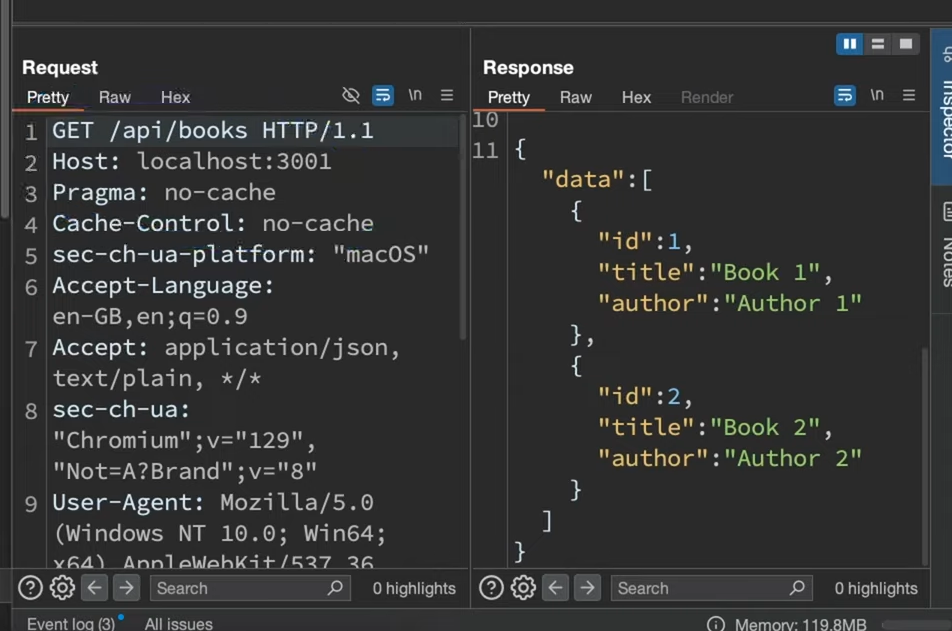

# Static vs dynamic routes is extremely simple — don’t overthink it.

---

# ✅ Static Route

A **static route** matches **exactly one fixed path**.
Nothing changes, no variables, no parameters.

### Examples

```
/api/books
/api/about
/api/health
```

### Characteristics

* Always the same URL
* Server doesn't extract anything from the path
* Maps directly to a specific handler
* Usually used for **collections** or **fixed endpoints**

---

# ✅ Dynamic Route

A **dynamic route** contains **variables** (path parameters).
You use it when the path depends on some value (id, slug, username, etc).

### Examples

```
/api/books/:id
/api/users/:userId/posts/:postId
/api/products/:sku
```

These routes match multiple possible URLs:

```
/api/books/1
/api/books/123
/api/books/999
```

### Characteristics

* Contains parameters
* Server extracts variables from the path
* Usually used for **individual items**

Example in Express:

```js
app.get('/api/books/:id', (req, res) => {
    console.log(req.params.id); // dynamic part
});
```

---

# 🧨 The Core Difference (Short & Direct)

| Static Route               | Dynamic Route                        |
| -------------------------- | ------------------------------------ |
| Matches **one fixed path** | Matches **a pattern**                |
| No parameters              | Has path parameters                  |
| `/api/books`               | `/api/books/:id`                     |
| Same behavior every time   | Behavior depends on extracted values |

---

If you want, I can also explain **query params vs dynamic params**, because people often mix those up too.
